In [38]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

%matplotlib inline

if os.getcwd().split('/')[-1] == "notebooks":
    %cd ..


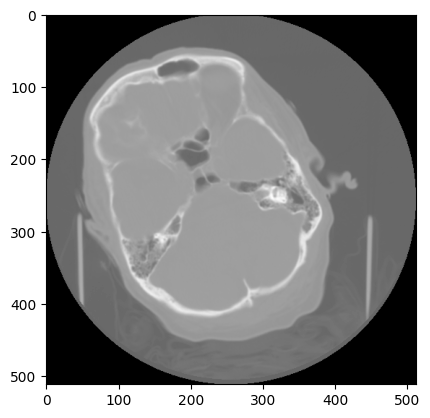

In [39]:
img_path = 'data/raw/test.dcm'
img_dicom = pydicom.dcmread(img_path)
# convert to numpy array
# Check the PhotometricInterpretation metadata
if img_dicom.PhotometricInterpretation == 'MONOCHROME1':
    image = np.invert(img_dicom.pixel_array)
else:
    image = img_dicom.pixel_array

# Rescale the pixel values to [0, 255]
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# show original image
plt.imshow(image, cmap='gray') 

## Apply radon transform to generate Sinogram

Text(0.5, 1.0, 'Radon transform\n(Sinogram)')

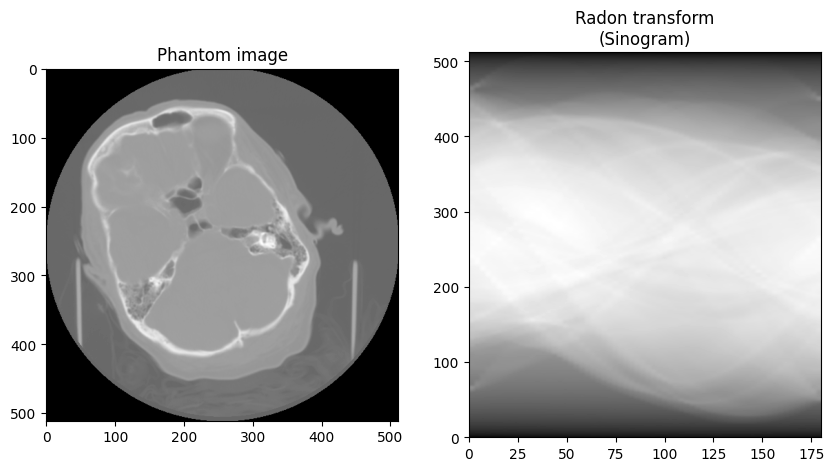

In [53]:
from skimage.transform import radon

subsample = 8
theta = np.linspace(0., 180., max(image.shape)//subsample, endpoint=False)
sinogram = radon(image, theta=theta)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Phantom image')

plt.subplot(1, 2, 2)
plt.imshow(sinogram, cmap='gray',
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')
plt.title('Radon transform\n(Sinogram)')


## Apply noise to the Sinogram

Text(0.5, 1.0, 'Noisy Sinogram')

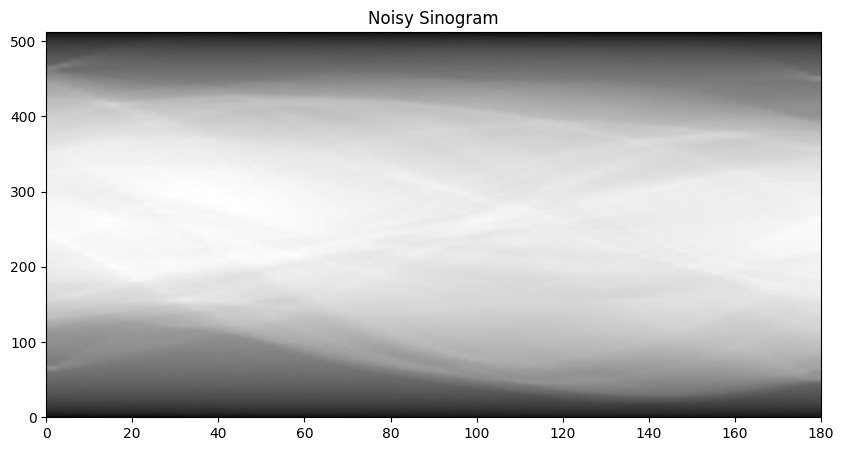

In [41]:
# Import noise simulator
from scripts.noise_simulation import NoiseConfiguration, NoiseSimulator, NoiseType
# noise_types, noise_levels, train_noise_ratio, val_noise_ratio, test_noise_ratio
simulation_config = NoiseConfiguration([NoiseType.POISSON], [])
noisy_sinogram = NoiseSimulator.apply_noise(sinogram, simulation_config)

# show noisy sinogram
plt.figure(figsize=(10, 5))
plt.imshow(noisy_sinogram, cmap='gray',
           extent=(0, 180, 0, noisy_sinogram.shape[0]), aspect='auto')
plt.title('Noisy Sinogram')

## Reconstruct sinogram using filtered back projection

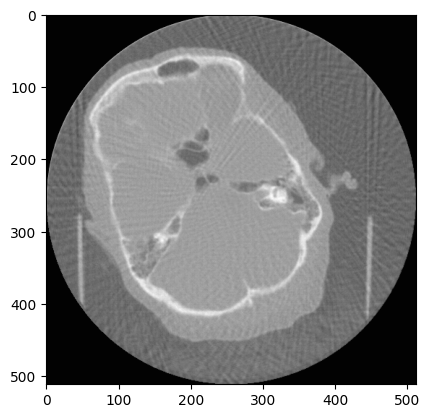

In [42]:
from skimage.transform import iradon

reconstructed_img = iradon(noisy_sinogram, theta=theta, filter_name='ramp')
plt.imshow(reconstructed_img, cmap='gray')
